In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
from IPython.display import display, HTML

In [32]:
df = pd.read_csv('../data/gold_price_data.csv', index_col='Date', parse_dates=True)
df.shape

(10787, 1)

In [33]:
df.head()

,Value
Date,
1970-01-01,35.2
1970-04-01,35.1
1970-07-01,35.4
1970-10-01,36.2
1971-01-01,37.4


<Axes: xlabel='Date'>

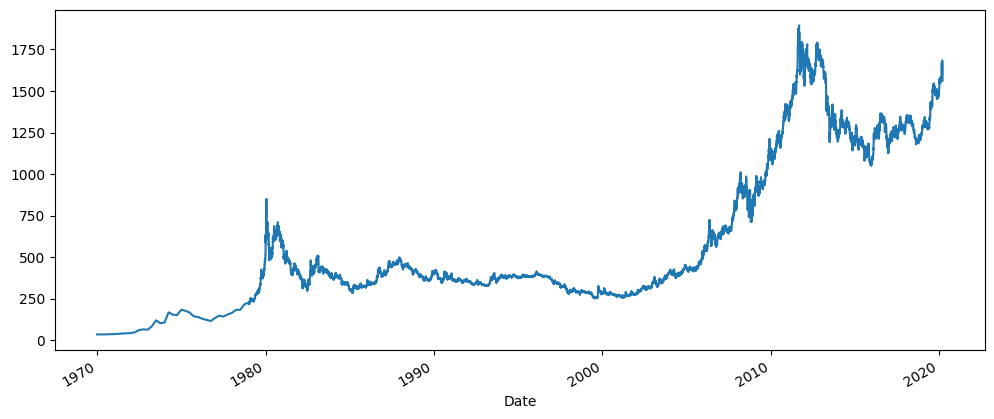

In [34]:
df.Value.plot(figsize=(12,5))

## Verificando a estacionariedade

In [35]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')

    print('1. ADF : ', dftest[0])
    print('2. P-valor : ', dftest[1])
    print('3. Nº de lags : ', dftest[2])
    print('4. Nº de observações usadas para a regressão ADF e valores críticos : ', dftest[3])
    print('5. Valores críticos:')
    for chave, valor in dftest[4].items():
        print('\t', chave, ': ', valor)

ad_test(df)

1. ADF :  -0.0711212445381321
2. P-valor :  0.9522400769147397
3. Nº de lags :  39
4. Nº de observações usadas para a regressão ADF e valores críticos :  10747
5. Valores críticos:
	 1% :  -3.4309586221840513
	 5% :  -2.861808976860248
	 10% :  -2.566913171245489


A série não é estacionária, pois o p-valor é muito maior que 0

Tentativa de transformar a série original em série estacionária

In [36]:
import pandas as pd

# Suponha que você tenha lido seu DataFrame como 'df' com a coluna 'Date' como índice
# Certifique-se de que a coluna 'Date' esteja no formato de data
df.index = pd.to_datetime(df.index)

# Use o groupby para agrupar os dados por mês e contar os registros em cada grupo
registros_por_mes = df.groupby(df.index.to_period('M')).size()

dataset_auxiliar = pd.DataFrame({'Data': registros_por_mes.index, 'Quantidade de Registros': registros_por_mes.values})

dataset_auxiliar.head(50)

,Data,Quantidade de Registros
0,1970-01,1
1,1970-04,1
2,1970-07,1
3,1970-10,1
4,1971-01,1
5,1971-04,1
6,1971-07,1
7,1971-10,1
8,1972-01,1
9,1972-04,1


In [37]:
dataset_auxiliar.tail()

,Data,Quantidade de Registros
527,2019-11,21
528,2019-12,22
529,2020-01,23
530,2020-02,20
531,2020-03,10


In [38]:
dataset_auxiliar['Quantidade de Registros'].max()

23

In [39]:
df.index = pd.to_datetime(df.index)

data_limite = pd.to_datetime('1978-12-31')

# Crie uma nova versão do DataFrame excluindo todas as linhas anteriores à data limite
df = df[df.index >= data_limite]
df

,Value
Date,
1979-01-01,226.00
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15
1979-01-05,225.50
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


<Axes: xlabel='Date'>

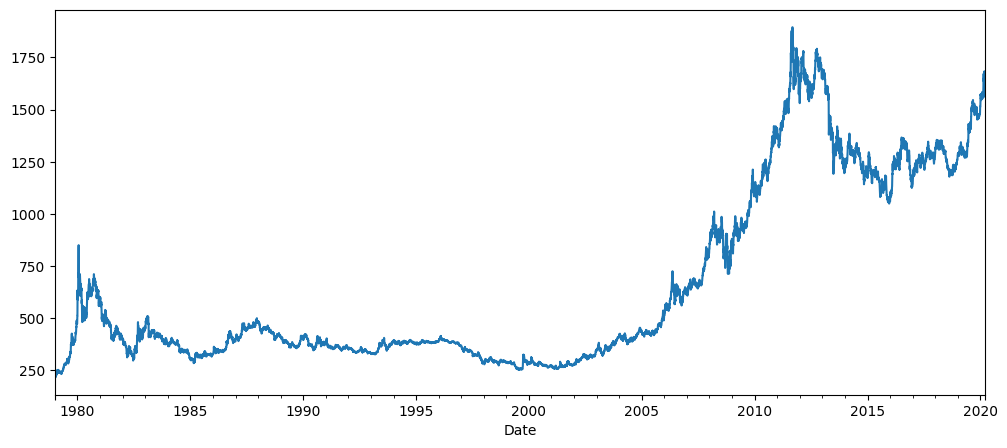

In [40]:
df.Value.plot(figsize=(12,5))

In [41]:
df

,Value
Date,
1979-01-01,226.00
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15
1979-01-05,225.50
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


<Axes: xlabel='Date'>

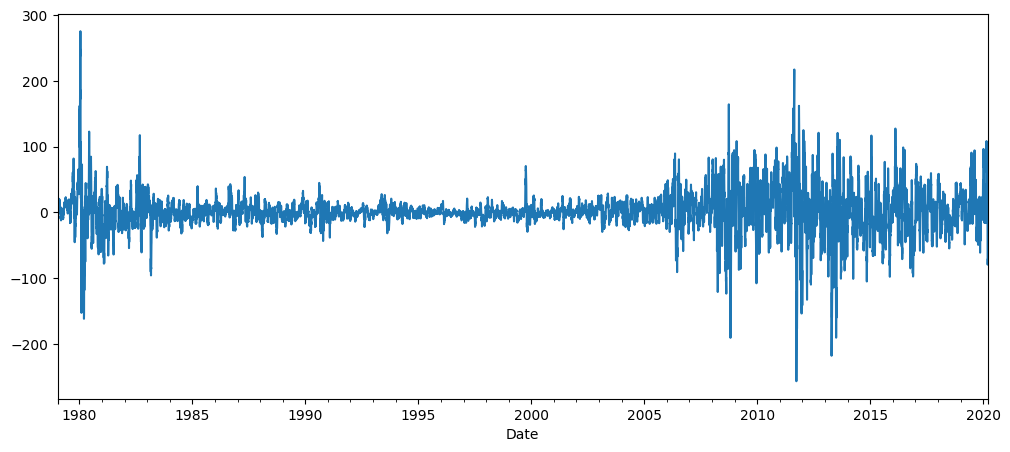

In [42]:

# Calcule a diferença entre os valores e os valores no mesmo mês do ano anterior
df['diferenca_sazonal'] = df['Value'] - df['Value'].shift(12)

# Remova os NaN resultantes da diferenciação
df.dropna(inplace=True)

df['diferenca_sazonal'].plot(figsize=(12,5))

In [43]:
df_dif_sazonal = pd.DataFrame(df['diferenca_sazonal'])
df_dif_sazonal

,diferenca_sazonal
Date,
1979-01-17,1.25
1979-01-18,4.95
1979-01-19,11.95
1979-01-22,11.85
1979-01-23,4.50
...,...
2020-03-09,53.50
2020-03-10,12.40
2020-03-11,-17.90


In [44]:
ad_test(df_dif_sazonal)

1. ADF :  -14.83304733434077
2. P-valor :  1.8864522466800884e-27
3. Nº de lags :  39
4. Nº de observações usadas para a regressão ADF e valores críticos :  10698
5. Valores críticos:
	 1% :  -3.430961410522751
	 5% :  -2.861810209022693
	 10% :  -2.5669138271239897


agora o dataset é estacionário

In [45]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [57]:
stepwise_model = auto_arima(df_dif_sazonal['diferenca_sazonal'], stepwise=True, seasonal=False, trace=True)

stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=84184.493, Time=4.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=103455.367, Time=0.72 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=84331.384, Time=0.78 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=94152.930, Time=1.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=84315.329, Time=1.46 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=6.54 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=84337.557, Time=3.94 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=84171.069, Time=4.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=84289.903, Time=1.82 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=8.91 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=84160.060, Time=8.74 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=84276.997, Time=2.81 sec
 ARIMA(3,0,4)(0,0,0)[0]             : AIC=inf, Time=10.42 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=9.08 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10738
Model:               SARIMAX(2, 0, 4)   Log Likelihood              -42071.649
Date:                Sat, 02 Sep 2023   AIC                          84159.298
Time:                        23:37:09   BIC                          84217.551
Sample:                    01-17-1979   HQIC                         84178.947
                         - 03-13-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0490      0.030      1.651      0.099      -0.009       0.107
ar.L1          1.7719      0.011    164.210      0.000       1.751       1.793
ar.L2         -0.8044      0.009    -85.465      0.000      -0.823      -0.786
ma.L1         -0.8592      0.012    -71.722      0.000      -0.883      -0.836
ma.L2          0.0306      0.006      5.162      0.000       0.019       0.042
ma.L3          0.0292      0.006      4.566      0.000       0.017       0.042
ma.L4          0.0508      0.006      8.784      0.000       0.039       0.062
sigma2       148.0828      0.713    207.721      0.000     146.686     149.480
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             93367.88
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               3.56   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
print(stepwise_model.aic())

84159.29840546378


In [66]:
from statsmodels.tsa.arima.model import ARIMA

Divisão dos dados em treino e teste

In [67]:
print(df_dif_sazonal.shape)
treino = df_dif_sazonal.loc['1979-01-01': '2018-01-01']
teste  = df_dif_sazonal.loc['2018-01-02':]
print(treino.shape, teste.shape)

(10738, 1)
(10164, 1) (574, 1)


In [68]:
model = ARIMA(treino['diferenca_sazonal'], order=(2,0,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      diferenca_sazonal   No. Observations:                10164
Model:                 ARIMA(2, 0, 4)   Log Likelihood              -39870.739
Date:                Sat, 02 Sep 2023   AIC                          79757.478
Time:                        23:38:30   BIC                          79815.291
Sample:                    01-17-1979   HQIC                         79777.031
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2396      1.391      0.891      0.373      -1.487       3.966
ar.L1          1.8914      0.003    606.261      0.000       1.885       1.898
ar.L2         -0.8916      0.003   -298.368      0.000      -0.897      -0.886
ma.L1         -0.9695      0.005   -177.845      0.000      -0.980      -0.959
ma.L2          0.0129      0.006      2.097      0.036       0.001       0.025
ma.L3          0.0140      0.007      2.047      0.041       0.001       0.027
ma.L4         -0.0557      0.006    -10.108      0.000      -0.067      -0.045
sigma2       149.5187      0.735    203.455      0.000     148.078     150.959
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             97076.84
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               3.46   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Predições no conjunto de teste

In [69]:
inicio = len(treino)
fim = len(treino)+len(teste)-1
pred = model.predict(start=inicio, end=fim, typ='levels')
print(pred)


2018-01-02    36.927003
2018-01-03    33.026152
2018-01-04    29.366510
2018-01-05    26.392883
2018-01-08    23.736042
                ...    
2020-03-09     1.308539
2020-03-10     1.308397
2020-03-11     1.308255
2020-03-12     1.308113
2020-03-13     1.307971
Freq: B, Name: predicted_mean, Length: 574, dtype: float64


<Axes: xlabel='Date'>

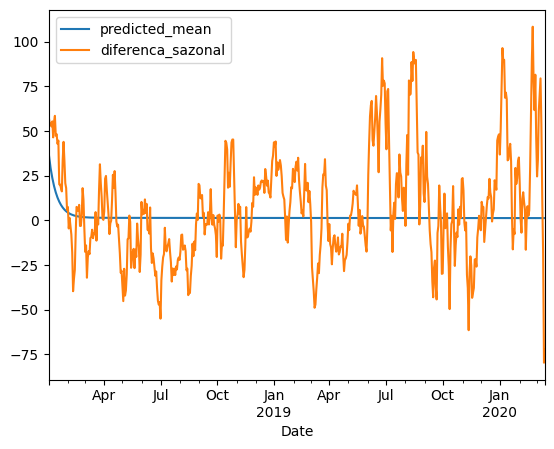

In [70]:
pred.plot(legend=True)
teste['diferenca_sazonal'].plot(legend=True)